In [1]:
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
import numpy as np
from halotools import empirical_models as EM
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from Functions import Functions as F
from Functions import Functions_c as F_c
from colossus.cosmology import cosmology
import scipy.interpolate as inter
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
cosmology.setCosmology("planck15")
Cosmo = cosmology.getCurrent()
h = Cosmo.h
h_3 = h*h*h
SMF_Bin = 0.1
SMF_x = np.arange(9, 12.5, SMF_Bin)

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
#from the model
usSHMF_Data = np.loadtxt("./Subhalos/Surviving_Subhalosinf.dat")
HaloMassRange_1 = usSHMF_Data[0,1:]
usSHMF_z = usSHMF_Data[:,0]

Mass at z = 4 9.858
Mass at z = 0 11.24281176567573


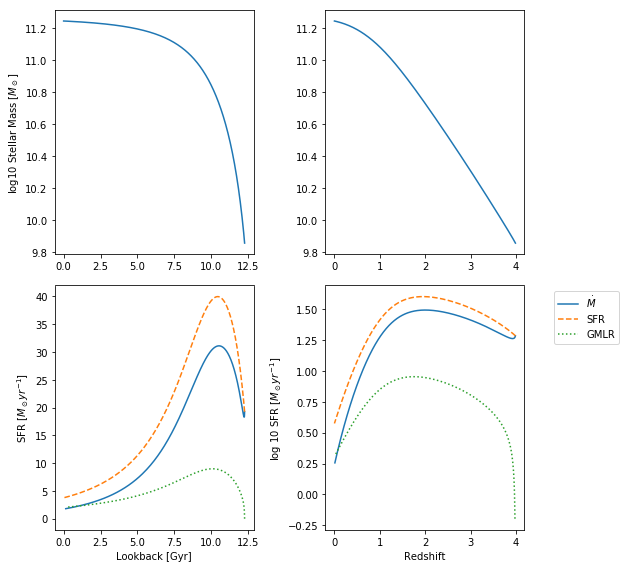

'plt.legend(bbox_to_anchor=(1.5, 1))\nprint(M_out[0,-1])\nplt.tight_layout()\n#plt.savefig("./Other_Data_Outputs/Leitner11Comp.png")\nplt.show()'

In [6]:
#z = np.flip(usSHMF_z[1:], 0)
z_infall = 4
z = np.flip(np.arange(0, z_infall, 0.01), 0)
t = F.RedshiftToTimeArr(0) - F.RedshiftToTimeArr(z)
#print(t)
d_t = t[:-1] -t[1:]
d_t = np.insert(d_t, 0, d_t[0])
#M_in = np.array([10.9, 10.1, 8.8]).astype(float) #FS[7.7,8,9.0, 9.21] #Starforming[4.95, 6.4, 7.6, 8.6] #nonstarforming[4.85, 6.45, 8.7, 9.55]
M_in = np.array([9.858]).astype(float)
#M_in = np.array([10.92, 10.10, 8.71]).astype(float) # Paper 2 z = 4
#M_in = np.array([10.39, 9.47, 8.15]).astype(float) # Paper 2 z = 5


#Dynmaical Quenching
"""
Tdyn = F.DynamicalTime_Fun(z_infall)
Tau = Tdyn*4.282*np.power(10, -0.363*(M_in - 10))
Tau[Tau < Tdyn*4.282] = Tdyn*4.282
print("Tau:", Tau, Tdyn*4.282)
T_quench = t[0] - Tau
print("T_quench:", T_quench)
"""


T_quench = np.full_like(M_in, -1) #no quenching
#T_quench = np.array([-1.0, 5]) #manual quenching
Tau_f = np.full_like(M_in, 2)

StripFactor = np.full_like(M_in, 0) #no stripping

M_out, M_dot, SFH, GMLR = F_c.Starformation_c(M_in, t, d_t, z, np.full_like(M_in, 100), T_quench, Tau_f, StripFactor, SFR_Model = "CE", Scatter_On = 0)
M_out = np.array(M_out)
M_dot = np.array(M_dot)
SFH = np.array(SFH)
GMLR = np.array(GMLR)


#f, SubPlots = plt.subplots(2,2, figsize = (9,8)) #one plot
for i, M in enumerate(M_out):
    f, SubPlots = plt.subplots(2,2, figsize = (9,8)) #multiple plots
    SubPlots[0][0].plot(t, M)
    SubPlots[0][1].plot(z, M)


    SubPlots[1][0].plot(t[:-1], (M_dot[i])[:-1], label = "$\dot{M}$")
    SubPlots[1][0].plot(t, (SFH[i])/((d_t)*10**9), "--", label = "SFR")
    SubPlots[1][0].plot(t[:-1], (GMLR[i])[:-1], ":",label = "GMLR")
    SubPlots[1][0].set_xlabel("Lookback [Gyr]")
    SubPlots[1][1].plot(z[:-1], np.log10((M_dot[i])[:-1]), label = "$\dot{M}$")
    SubPlots[1][1].plot(z, np.log10((SFH[i])/((d_t)*10**9)), "--", label = "SFR")
    SubPlots[1][1].plot(z[:-1], np.log10((GMLR[i])[:-1]), ":",label = "GMLR")
    SubPlots[0][0].set_ylabel("log10 Stellar Mass [$M_\odot$]")
    SubPlots[1][0].set_ylabel("SFR [$M_\odot yr^{-1}$]")
    SubPlots[1][1].set_ylabel("log 10 SFR [$M_\odot yr^{-1}$]")
    SubPlots[1][0].set_xlabel("Lookback [Gyr]")
    SubPlots[1][1].set_xlabel("Redshift")
    plt.legend(bbox_to_anchor=(1.5, 1))
    
    
    print("Mass at z = 4", M_out[i,np.digitize(4, bins = z)])
    print("Mass at z = 0", M_out[i,np.digitize(0, bins = z)])
    plt.tight_layout()
    #plt.savefig("./Other_Data_Outputs/Leitner11Comp.png")
    plt.show()
    
"""
ax2 = ax1.twiny()
Ticklocations = [0.1,2,4,6,8,10,12]
ax2.set_xticks(Ticklocations)
Ticklabels = [z[np.digitize(i, t)]for i in Ticklocations]
ax2.set_xticklabels(Ticklabels)
ax2.set_xlabel("Redshift")
"""
"""plt.legend(bbox_to_anchor=(1.5, 1))
print(M_out[0,-1])
plt.tight_layout()
#plt.savefig("./Other_Data_Outputs/Leitner11Comp.png")
plt.show()"""



In [ ]:
np.shape(M_out)

In [ ]:
Out = np.vstack((z, M_out, GMLR))
np.save("./PaperTwoPlotData/StarformationHistories/Pip_CESFH.dat", Out)

In [ ]:
CM_LZ = np.loadtxt('LogMass8_z.txt')
#print(M_out[-1])
f, SubPlots = plt.subplots(1,2, figsize = (9,4), sharey = True)
SubPlots[0].plot(t, M_out[0], label = "me")
SubPlots[0].plot(F.RedshiftToTimeArr(0)-F.RedshiftToTimeArr(CM_LZ[:,0]), CM_LZ[:,1], label = "them")
SubPlots[1].plot(z, M_out[0], label = "me")
SubPlots[1].plot(CM_LZ[:,0], CM_LZ[:,1], label = "them")
plt.legend()
plt.show()

In [ ]:
plt.plot(t, 1 - 0.046*np.log(np.divide(t*10**9, 2.67*10**5)+1))
plt.show()

In [ ]:
M_in = np.arange(5, 12, 0.01)
M_range = np.arange(5, 13, 0.01)
z_range = np.flip(usSHMF_z[1:], 0)
Grid = np.full((len(M_range), len(z_range),), 0.0)
print(np.shape(Grid))
t = F.RedshiftToTimeArr(0) - F.RedshiftToTimeArr(z_range)
d_t = t[:-1] -t[1:]
d_t = np.insert(d_t, 0, d_t[0])
s_f = np.zeros_like(d_t)

for i in M_in:
    M_out, M_dot, SFH, GMLR = F_c.Starformation_c(np.array([i]), t, d_t, z_range, s_f)
    ix = [np.digitize(M_out, M_range)-1, np.arange(len(z_range)),]
    try:
        Grid[ix] = i
    except:
        print(ix)
cmap = cm.coolwarm
fig = plt.contourf(z_range, M_range, Grid, levels = M_range, cmap=cm.get_cmap(cmap))
cbar = plt.colorbar(fig)
plt.show()
print(Grid)

In [ ]:
def M_at_z6(z, M):
    M_bin, z_bin = np.digitize(M, M_range)-1, np.digitize(z, z_range)-1
    return Grid[M_bin, z_bin]

In [ ]:
np.savetxt("MasterArr/Interp_z.txt", z)